<a href="https://colab.research.google.com/github/gkpatell/INDE-577-Final-Project/blob/main/Supervised%20Learning/Random%20Forest/SL_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Ensure reproductibility
np.random.seed(42)

## Step2: Load and Explore Dataset

In [ ]:
# Load the California Housing Dataset
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

In [ ]:
# Extract features and target
X = data['data']
y = data['target']

# Display dataset overview
print("Dataset Overview:")
print(X.head())
print("\nTarget Overview:")
print(y.head())

Dataset Overview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target Overview:
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(X.isnull().sum())


Missing Values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


In [ ]:
# Summary statistics
print("\nSummary Statistics:")
print(X.describe())


Summary Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.4297

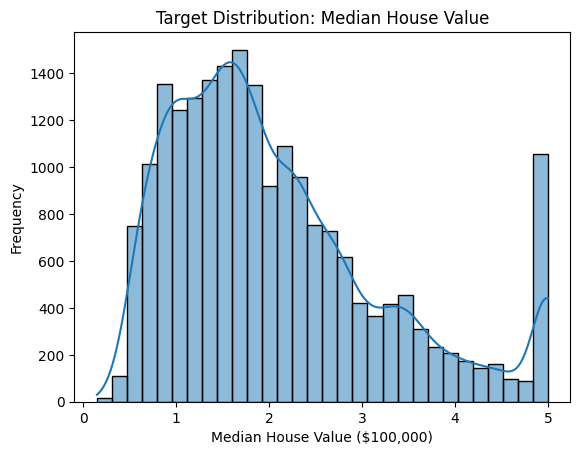

In [ ]:
# Visualize target distribution
sns.histplot(y, kde=True, bins=30)
plt.title("Target Distribution: Median House Value")
plt.xlabel("Median House Value ($100,000)")
plt.ylabel("Frequency")
plt.show()

## Step 3: Preprocessing

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 4: Implement Random Forest Regressor

In [ ]:
# Initialize the Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

In [ ]:
# Train the model
regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [ ]:
# Predictions on training and test sets
y_train_pred = regressor.predict(X_train_scaled)
y_test_pred = regressor.predict(X_test_scaled)

## Step 5: Performance Evaluation

In [ ]:
# Define evaluation metrics
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{dataset_name} Performance:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"R-squared: {r2:.4f}")

In [ ]:
# Evaluate performance
evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_test, y_test_pred, "Test")


Training Performance:
Mean Squared Error: 0.1712
Mean Absolute Error: 0.2918
R-squared: 0.8719

Test Performance:
Mean Squared Error: 0.2963
Mean Absolute Error: 0.3663
R-squared: 0.7739


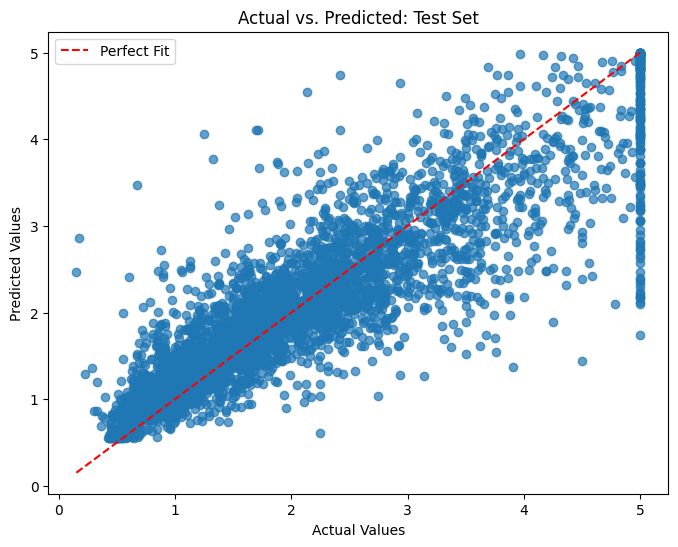

In [ ]:
# Visualize Actual vs. Predicted (Test Set)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', label="Perfect Fit")
plt.title("Actual vs. Predicted: Test Set")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

## Step 6: Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5]
}

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Best parameters and score
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)


Best Parameters from GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# Train with best parameters
best_regressor = grid_search.best_estimator_

In [ ]:
# Predictions with tuned model
y_train_pred_tuned = best_regressor.predict(X_train_scaled)
y_test_pred_tuned = best_regressor.predict(X_test_scaled)

In [ ]:
# Evaluate tuned model
evaluate_model(y_train, y_train_pred_tuned, "Training (Tuned)")
evaluate_model(y_test, y_test_pred_tuned, "Test (Tuned)")


Training (Tuned) Performance:
Mean Squared Error: 0.1932
Mean Absolute Error: 0.3001
R-squared: 0.8554

Test (Tuned) Performance:
Mean Squared Error: 0.2956
Mean Absolute Error: 0.3638
R-squared: 0.7744


## Step 7: Feature Importance Analysis

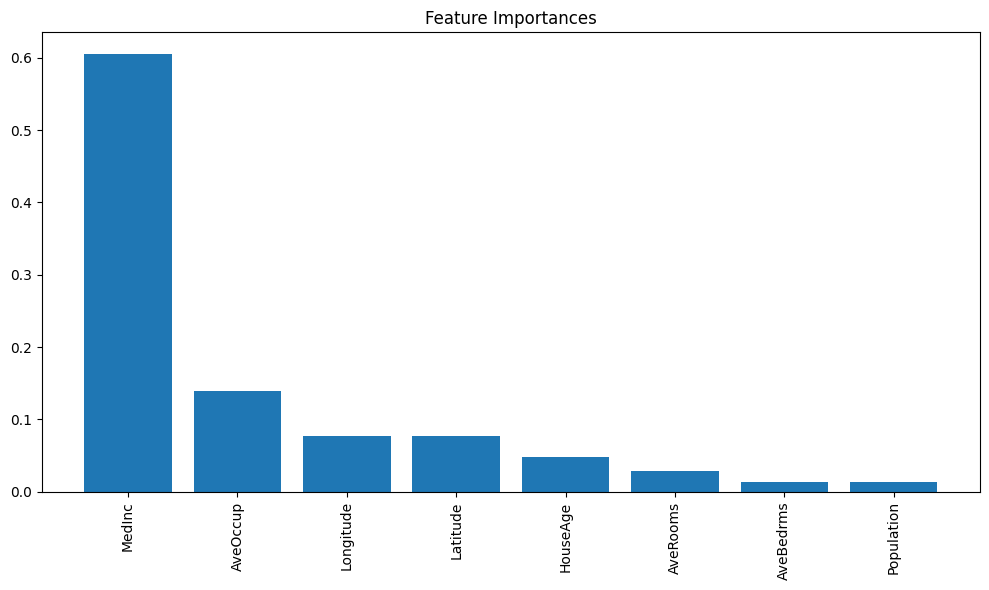

In [ ]:
# Extract feature importances
importances = best_regressor.feature_importances_
features = X.columns

# Sort feature importances
def plot_feature_importances(importances, features):
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importances")
    plt.bar(range(len(features)), importances[indices], align="center")
    plt.xticks(range(len(features)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importances(importances, features)

## Step 8: Error Analysis

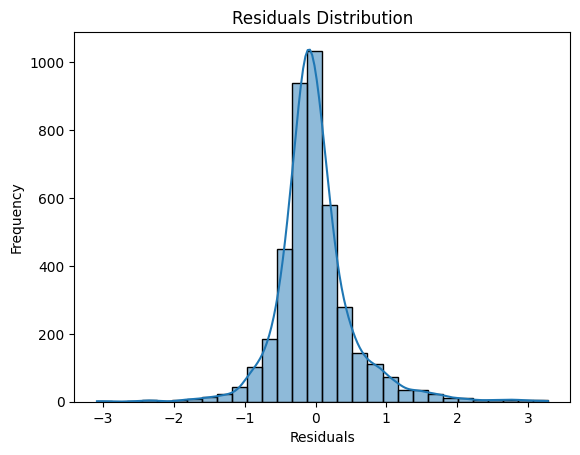

In [ ]:
# Calculate residuals
residuals = y_test - y_test_pred_tuned

# Visualize residuals distribution
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

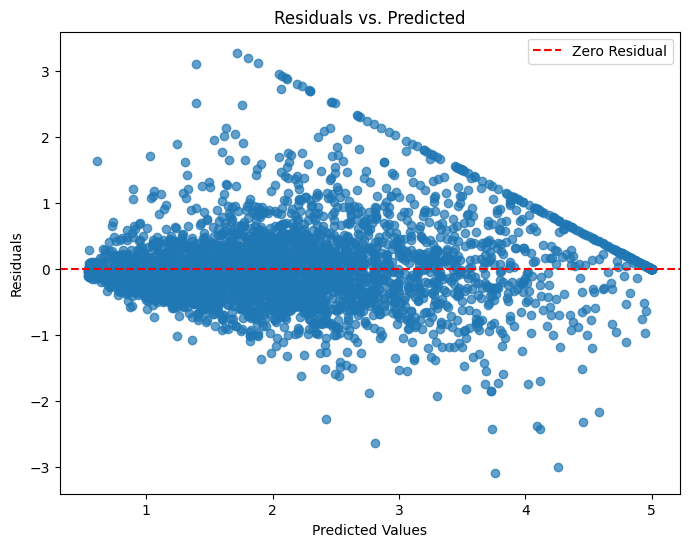

In [ ]:
# Residuals vs. Predicted plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred_tuned, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--', label="Zero Residual")
plt.title("Residuals vs. Predicted")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.legend()
plt.show()

## Step 9: Saving Results & Model

In [ ]:
# Save model using joblib
import joblib

# Save the tuned model
joblib.dump(best_regressor, "random_forest_regressor_model.pkl")

# Save results to CSV
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred_tuned,
    'Residual': residuals
})
results.to_csv("random_forest_results.csv", index=False)

print("\nModel and results saved successfully.")


Model and results saved successfully.
